In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns


In [2]:
from pathlib import Path
data_path = Path("../metrodata/MetroPT3(AirCompressor).csv")
print(data_path.resolve())

C:\Users\MSI\Desktop\Mlops\Mlops\metrodata\MetroPT3(AirCompressor).csv


In [3]:
# data_path=Path("C:/Users/MSI/Desktop/Ml bassem/Mlops/Mlops/data/MetroPT3(AirCompressor).csv")

data=pd.read_csv(data_path)

In [4]:
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
df = data.drop(['Unnamed: 0'], axis=1)

In [6]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# You want to include the time information as a feature in your model.
df['timestamp'] = df['timestamp'].apply(lambda x: x.timestamp())

In [8]:
print("Start date is: ", df['timestamp'].min())
print("End date is: ", df['timestamp'].max())

Start date is:  1580515200.0
End date is:  1598932790.0


In [9]:
df.dtypes

timestamp          float64
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

In [10]:
# X = df.drop(columns=['timestamp'])
# y = df['timestamp']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=42

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)


In [12]:
sequence_length = 10  # Number of time steps in each sequence
X = []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
X = np.array(X)

Build the LSTM Autoencoder

In [13]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dropout(rate=0.2))

# model.add(RepeatVector(trainX.shape[1]))

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(trainX.shape[2])))
# model.compile(optimizer='adam', loss='mae')
# model.summary()

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

input_dim = X.shape[2]  # Number of features including timestamp

# Encoder
inputs = Input(shape=(sequence_length, input_dim))
encoded = LSTM(64, activation='relu', return_sequences=False)(inputs)
encoded = Dropout(0.2)(encoded)  # Dropout after the LSTM layer
encoded = Dense(32, activation='relu')(encoded)

# Decoder
decoded = RepeatVector(sequence_length)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)  # Dropout after the decoder LSTM layer
outputs = TimeDistributed(Dense(input_dim))(decoded)

# Autoencoder model
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')


In [15]:
autoencoder.fit(X, X, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
37924/37924 ━━━━━━━━━━━━━━━━━━━━ 247s 6ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 2/5
37924/37924 ━━━━━━━━━━━━━━━━━━━━ 250s 7ms/step - loss: 0.0035 - val_loss: 0.0094
Epoch 3/5
37924/37924 ━━━━━━━━━━━━━━━━━━━━ 245s 6ms/step - loss: 0.0030 - val_loss: 0.0095
Epoch 4/5
37924/37924 ━━━━━━━━━━━━━━━━━━━━ 222s 6ms/step - loss: 0.0028 - val_loss: 0.0090
Epoch 5/5
37924/37924 ━━━━━━━━━━━━━━━━━━━━ 205s 5ms/step - loss: 0.0027 - val_loss: 0.0090


In [16]:
reconstructed = autoencoder.predict(X)
reconstruction_error = np.mean(np.square(X - reconstructed), axis=(1, 2))


47405/47405 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step


In [60]:
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold
print("Total number of samples:", len(reconstruction_error))
print("Threshold value (95th percentile):", threshold)
print("Number of anomalies detected:", np.sum(anomalies))


Total number of samples: 1516938
Threshold value (95th percentile): 0.017063328703089752
Number of anomalies detected: 75847


In [61]:
percentage_anomalies = (np.sum(anomalies) / len(reconstruction_error)) * 100
print(f"Percentage of anomalies detected: {percentage_anomalies:.2f}%")


Percentage of anomalies detected: 5.00%


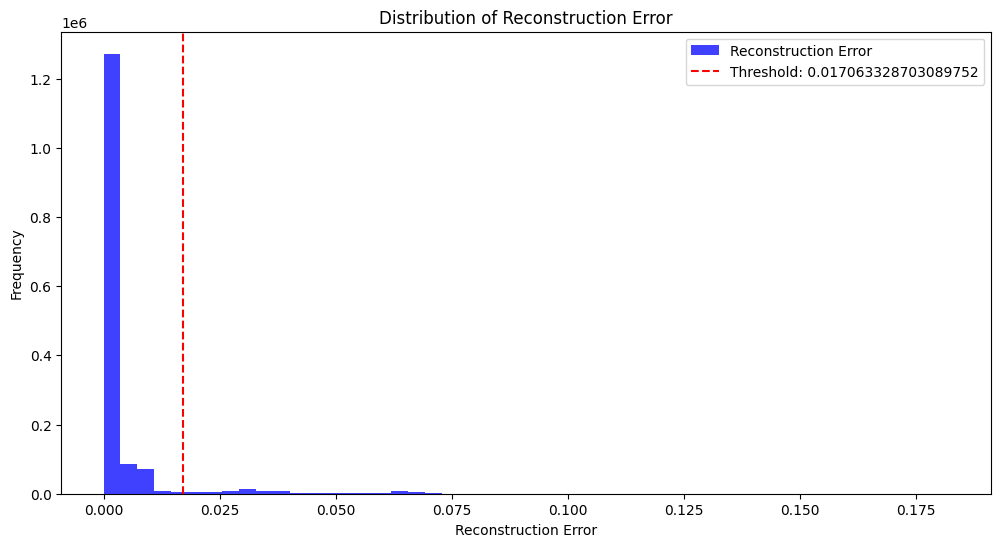

In [62]:
import matplotlib.pyplot as plt

# Plot histogram of reconstruction errors
plt.figure(figsize=(12, 6))
plt.hist(reconstruction_error, bins=50, alpha=0.75, color='blue', label='Reconstruction Error')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')
plt.title('Distribution of Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Reconstruction Error Distribution:

The majority of the data points have very low reconstruction errors, concentrated around 0. This suggests that the model has reconstructed these data points very well, indicating they are likely normal or non-anomalous.
A small portion of the data points has higher reconstruction errors, but these are much less frequent.

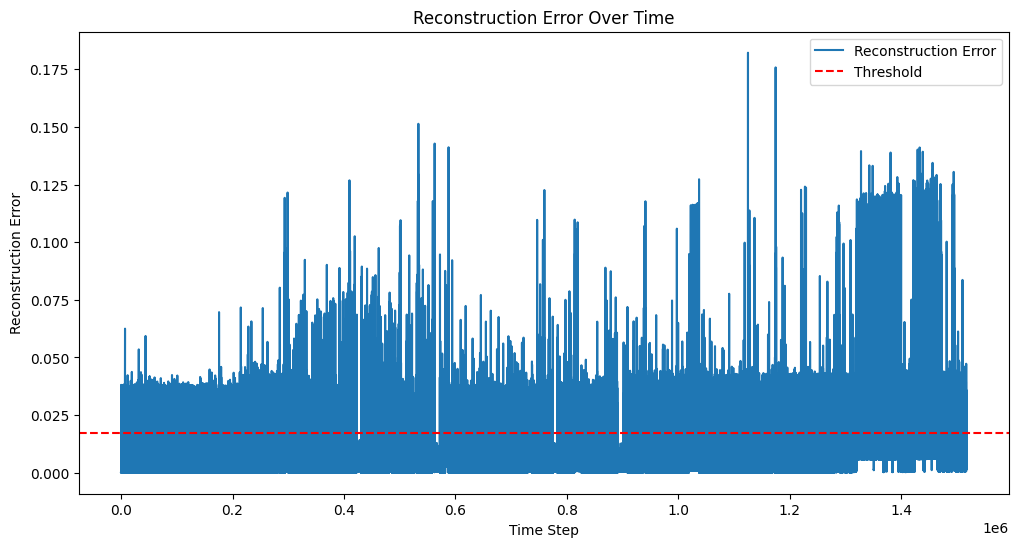

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Over Time')
plt.xlabel('Time Step')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()


In [37]:
anomalous_indices = np.where(anomalies)[0]
anomalous_timestamps = df.iloc[anomalous_indices]['timestamp']
print("Anomalous timestamps:")
print(anomalous_timestamps)


Anomalous timestamps:
144       2020-02-01 00:23:47
145       2020-02-01 00:23:57
146       2020-02-01 00:24:07
147       2020-02-01 00:24:17
148       2020-02-01 00:24:27
                  ...        
1516724   2020-09-01 03:23:00
1516865   2020-09-01 03:46:17
1516866   2020-09-01 03:46:27
1516867   2020-09-01 03:46:37
1516868   2020-09-01 03:46:47
Name: timestamp, Length: 75847, dtype: datetime64[ns]


In [38]:
# Convert the 'timestamp' column from Unix timestamp (float64) to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Now, print the anomalous timestamps to check the result
anomalous_timestamps = df.iloc[anomalous_indices]['timestamp']
print("Anomalous timestamps:")
print(anomalous_timestamps)


Anomalous timestamps:
144       2020-02-01 00:23:47
145       2020-02-01 00:23:57
146       2020-02-01 00:24:07
147       2020-02-01 00:24:17
148       2020-02-01 00:24:27
                  ...        
1516724   2020-09-01 03:23:00
1516865   2020-09-01 03:46:17
1516866   2020-09-01 03:46:27
1516867   2020-09-01 03:46:37
1516868   2020-09-01 03:46:47
Name: timestamp, Length: 75847, dtype: datetime64[ns]


Check if anomalous timestamps are within the failure time windows

In [39]:
failure_reports = {
    'Start Time': ['2020-04-18 00:00', '2020-05-29 23:30', '2020-06-05 10:00', '2020-07-15 14:30'],
    'End Time': ['2020-04-18 23:59', '2020-05-30 06:00', '2020-06-07 14:30', '2020-07-15 19:00'],
    'Failure': ['Air Leak', 'Air Leak', 'Air Leak', 'Air Leak']
    
}

# Convert to DataFrame
failure_df = pd.DataFrame(failure_reports)

# Convert Start Time and End Time to datetime
failure_df['Start Time'] = pd.to_datetime(failure_df['Start Time'])
failure_df['End Time'] = pd.to_datetime(failure_df['End Time'])

print(failure_df)


           Start Time            End Time   Failure
0 2020-04-18 00:00:00 2020-04-18 23:59:00  Air Leak
1 2020-05-29 23:30:00 2020-05-30 06:00:00  Air Leak
2 2020-06-05 10:00:00 2020-06-07 14:30:00  Air Leak
3 2020-07-15 14:30:00 2020-07-15 19:00:00  Air Leak


In [40]:
# Loop through each anomalous timestamp and check if it falls within any of the failure report windows
anomalous_timestamps = pd.to_datetime(anomalous_timestamps)  # Ensure anomalous timestamps are in datetime format
anomalous_timestamps

144       2020-02-01 00:23:47
145       2020-02-01 00:23:57
146       2020-02-01 00:24:07
147       2020-02-01 00:24:17
148       2020-02-01 00:24:27
                  ...        
1516724   2020-09-01 03:23:00
1516865   2020-09-01 03:46:17
1516866   2020-09-01 03:46:27
1516867   2020-09-01 03:46:37
1516868   2020-09-01 03:46:47
Name: timestamp, Length: 75847, dtype: datetime64[ns]

In [41]:


# Create a list to store the corresponding failure reports
matching_failures = []

for anomaly_time in anomalous_timestamps:
    for index, row in failure_df.iterrows():
        if row['Start Time'] <= anomaly_time <= row['End Time']:
            matching_failures.append((anomaly_time, row['Failure']))

# Display the matching anomalous timestamps with the failure report details
matching_failures_df = pd.DataFrame(matching_failures, columns=['Anomaly Timestamp', 'Failure'])
print(matching_failures_df)


     Anomaly Timestamp   Failure
0  2020-04-18 00:16:31  Air Leak
1  2020-04-18 00:16:43  Air Leak
2  2020-04-18 00:16:54  Air Leak
3  2020-04-18 00:17:06  Air Leak
4  2020-04-18 00:17:18  Air Leak
5  2020-04-18 00:17:30  Air Leak
6  2020-05-30 05:55:47  Air Leak
7  2020-05-30 05:55:57  Air Leak
8  2020-05-30 05:56:06  Air Leak
9  2020-05-30 05:56:16  Air Leak
10 2020-05-30 05:56:26  Air Leak
11 2020-06-06 15:54:08  Air Leak
12 2020-06-06 15:54:18  Air Leak
13 2020-06-06 15:54:28  Air Leak
14 2020-06-06 15:54:38  Air Leak
15 2020-06-06 15:54:47  Air Leak
16 2020-06-06 15:54:57  Air Leak
17 2020-06-06 15:55:07  Air Leak
18 2020-06-06 20:02:09  Air Leak
19 2020-06-06 20:02:19  Air Leak
20 2020-06-06 20:02:29  Air Leak
21 2020-06-06 20:02:39  Air Leak
22 2020-06-06 20:02:49  Air Leak
23 2020-06-07 02:12:24  Air Leak
24 2020-06-07 02:12:34  Air Leak
25 2020-06-07 02:12:44  Air Leak
26 2020-06-07 02:12:54  Air Leak
27 2020-06-07 02:13:04  Air Leak
28 2020-06-07 02:13:14  Air Leak
29 2020-06

In [42]:
TP = len(matching_failures)  # Number of anomalous timestamps that correspond to a failure

# Total number of anomalies
total_anomalies = len(anomalous_timestamps)

# Calculate the percentage of correct correspondences
correct_percentage = (TP / total_anomalies) * 100

print(f"Total anomalies: {total_anomalies}")
print(f"True positives: {TP}")
print(f"Percentage of correct correspondences: {correct_percentage:.2f}%")

Total anomalies: 75847
True positives: 60
Percentage of correct correspondences: 0.08%


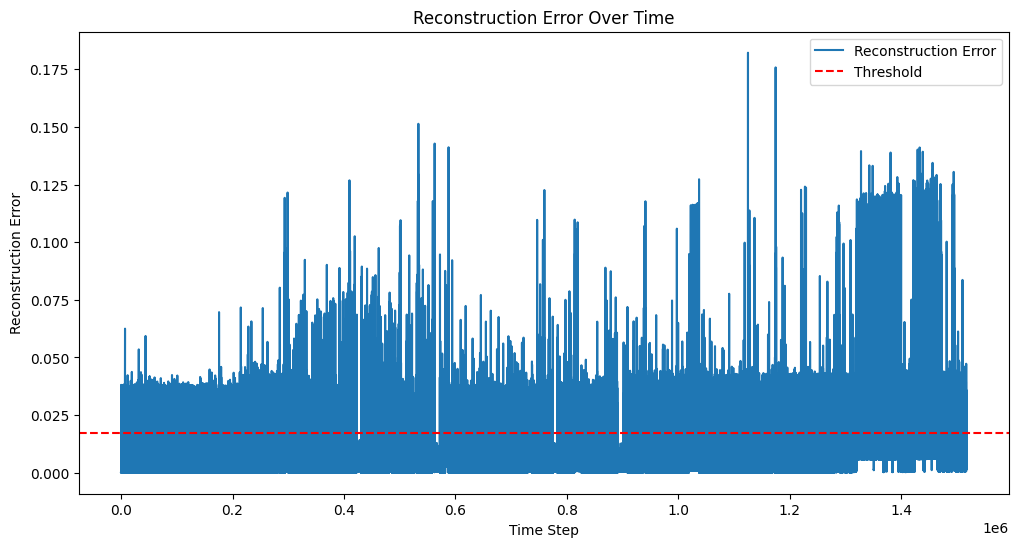

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(reconstruction_error, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Over Time')
plt.xlabel('Time Step')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()
